In [1]:
# Import libraries

import cv2
from plantcv import plantcv as pcv


In [2]:
class options:
    def __init__(self):
        self.image = "./img/color_image.jpg"
        self.debug = "plot"
        self.writeimg= False 
        self.result = "ml_tutorial_results.json"
        self.outdir = "."

# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug


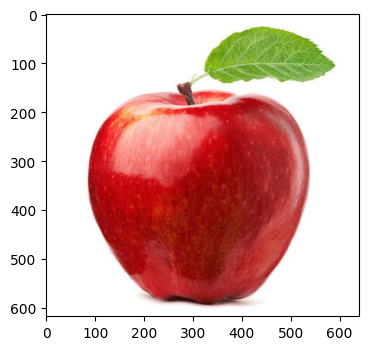

In [3]:
# Read image 

# Inputs:
#   filename - Image file to be read in 
#   mode - Return mode of image; either 'native' (default), 'rgb', 'gray', or 'csv' 
img, path, filename = pcv.readimage(filename=args.image)


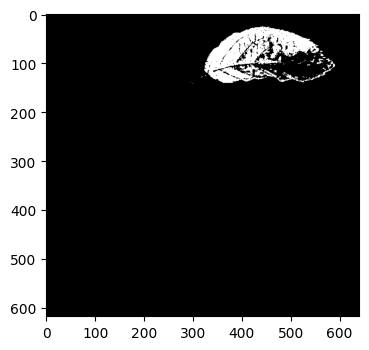

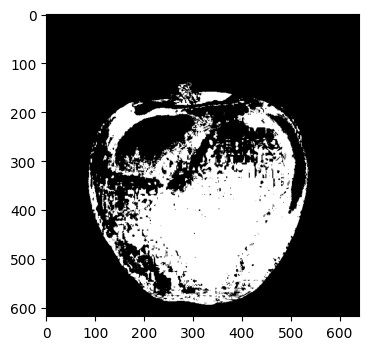

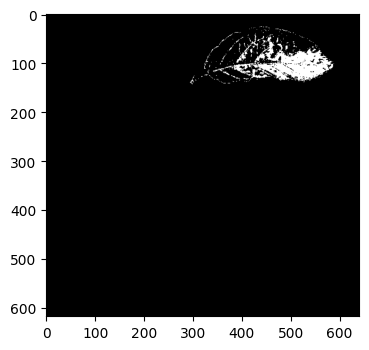

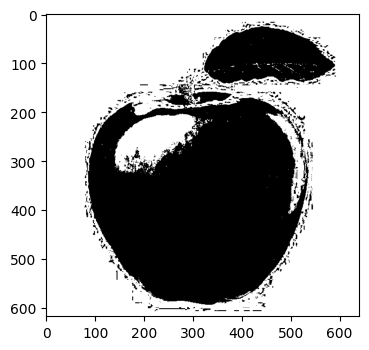

In [4]:
# Use the output file from `plantcv-train.py` to run the multiclass 
# naive bayes classification on the image. The function below will 
# print out 4 masks (plant, pustule, chlorosis, background)

# Inputs: 
#   rgb_img - RGB image data 
#   pdf_file - Output file containing PDFs from `plantcv-train.py`
mask = pcv.naive_bayes_classifier(rgb_img=img, 
                                  pdf_file="./img/machine_learning.txt")


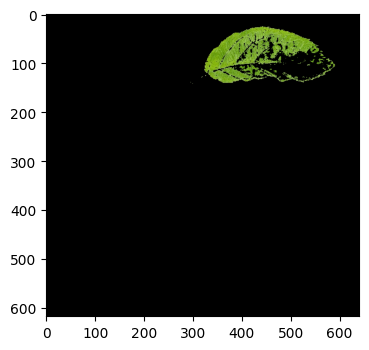

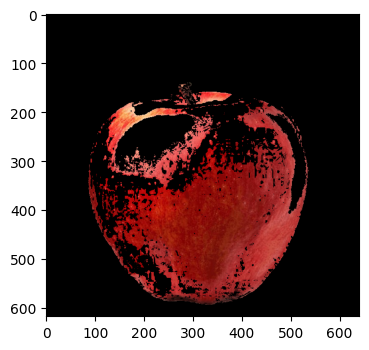

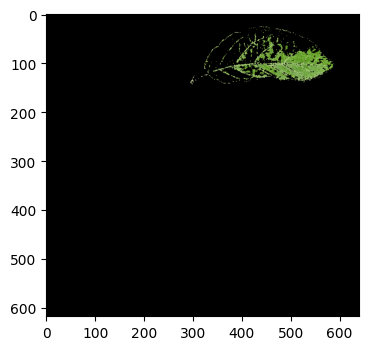

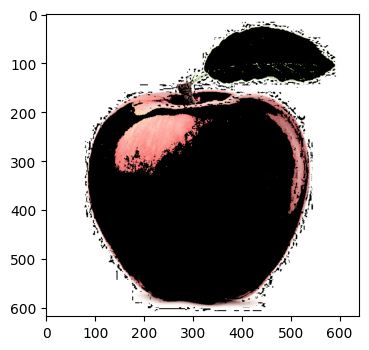

In [5]:
# We can apply each mask to the original image to more accurately 
# see what got masked

# Inputs:
#   img - RGB or grayscale image data 
#   mask - Binary mask image data 
#   mask_color - 'white' or 'black' 
plant_img = pcv.apply_mask(mask=(mask['plant']), img=img, mask_color='black')
pustule_img = pcv.apply_mask(mask=(mask['pustule']), img=img, mask_color='black')
chlorosis_img = pcv.apply_mask(mask=(mask['chlorosis']), img=img, mask_color='black')
background_img = pcv.apply_mask(mask=(mask['background']), img=img, mask_color='black')
